<a href="https://colab.research.google.com/github/NikyDS/sureStartND/blob/main/SarcasmDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt

In [3]:
#load the dataset 
df = pd.read_json("/content/drive/MyDrive/Dataset/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


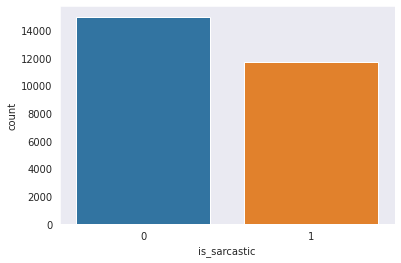

In [7]:
#plot the class labels distribution
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

In [9]:
#print the number of data examples
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [10]:
#print the total number of data examples
len(df.is_sarcastic)

26709

In [14]:
#define x and y
X = df.iloc[:, 1]
Y = df.iloc[:, 2]
print(X)
print(Y)

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object
0        0
1        0
2        1
3        1
4        0
        ..
26704    0
26705    0
26706    0
26707    0
26708    0
Name: is_sarcastic, Length: 26709, dtype: int64


In [16]:
#split the dataset into the train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print(X_test)

2254        federal prison system retires mcveigh's number
7958                                    men behaving badly
16460    'it was fine,' says man following visit with o...
12533    senators rip obama's 'flexible' interpretation...
5615     turns out, michael phelps was listening to fut...
                               ...                        
17198             the portland heroes who stood up to hate
25548    13 tweets that show  'pokemon go'  is a truly ...
23066    gun lobby politicians like bob goodlatte enabl...
14699    iowa board of tourism launches 'des moines is ...
22154    stripper failing school she's working self thr...
Name: headline, Length: 5342, dtype: object


In [17]:
#data preprocessing 
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
sequences_matrix.shape

(21367, 150)

In [18]:
sequences_matrix

array([[  0,   0,   0, ...,  64,   2, 102],
       [  0,   0,   0, ..., 311,   2, 743],
       [  0,   0,   0, ...,   0, 411, 107],
       ...,
       [  0,   0,   0, ..., 765,  14, 543],
       [  0,   0,   0, ..., 284,  28, 204],
       [  0,   0,   0, ...,  20, 124, 213]], dtype=int32)

In [19]:
np.amax(sequences_matrix)

999

In [21]:
#define the RNN model
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [22]:
# compile the model
model = RNN()
model.summary()
model.compile(loss = "binary_crossentropy", optimizer=RMSprop(), metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [23]:
#fit the model
history = model.fit(sequences_matrix, Y_train, batch_size=100, epochs=5, validation_split=.1)

Epoch 1/5
193/193 [==============================] - 27s 18ms/step - loss: 0.5502 - accuracy: 0.7021 - val_loss: 0.3879 - val_accuracy: 0.8208
Epoch 2/5
193/193 [==============================] - 3s 13ms/step - loss: 0.3770 - accuracy: 0.8311 - val_loss: 0.3788 - val_accuracy: 0.8297
Epoch 3/5
193/193 [==============================] - 3s 13ms/step - loss: 0.3546 - accuracy: 0.8414 - val_loss: 0.3765 - val_accuracy: 0.8301
Epoch 4/5
193/193 [==============================] - 3s 13ms/step - loss: 0.4078 - accuracy: 0.8404 - val_loss: 0.3795 - val_accuracy: 0.8259
Epoch 5/5
193/193 [==============================] - 3s 13ms/step - loss: 0.3338 - accuracy: 0.8555 - val_loss: 0.3911 - val_accuracy: 0.8315


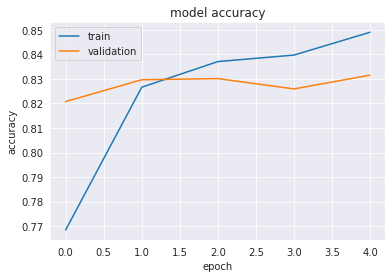

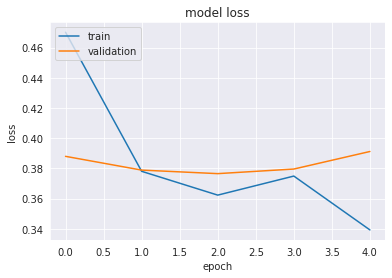

In [25]:
#plot the accuracy and loss curves
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
#evaluate on test set
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)
test_sequences_matrix.shape

(5342, 150)

In [26]:
accr = model.evaluate(test_sequences_matrix, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

167/167 [==============================] - 1s 6ms/step - loss: 0.3924 - accuracy: 0.8265
Test set
  Loss: 0.392
  Accuracy: 0.826
